In [1]:
import pandas as pd
import os
from nltk.tokenize import word_tokenize
from num2words import num2words
import nltk
import string
import unicodedata
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pickle
import math
import numpy as np
from matplotlib import pyplot as plt

In [2]:
folder_name ='Assignment3_IR/20_newsgroups'
files_path=[]
total_doc = 0
folders=['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 
             'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 
             'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 
             'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 
             'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
#for (root,dirs,files) in os.walk(str(os.getcwd()+'/'+folder_name+'/'),topdown=False):
for folder in folders:
    for files in sorted(os.listdir(folder_name+'/'+folder)):
        i=str(folder_name+'/'+folder+'/'+files)
        total_doc+=1
        files_path.append(i)

In [3]:
with open('Assignment3_IR/file.txt','r') as file:
    reader = file.read()
    reader = reader.split()
    static_score = {}
    i=0
    g=[]
    while(i<len(reader)):
        g.append(int(reader[i+1]))
        i=i+2

In [4]:
norm = [int(i)/max(g) for i in g]
print(len(norm))

19997


In [5]:
static_score={}
i=0
j=1
while(i<len(norm)):
    static_score[j]=norm[i]
    i=i+1
    j=j+1
print(len(static_score))

19997


In [6]:
doc_id=[words for words in range(1,19997+1)]
dic = dict(zip(files_path,doc_id))

In [7]:
def converToLower(text):
    text = text.lower()
    return text
lower = converToLower("hey what?")
lower

'hey what?'

In [8]:
def removePunctuations(text):
    punc = string.punctuation
    for i in punc:
        text = text.replace(i,"")
    return text
punc = removePunctuations("hello!! what are you upto?")
punc

'hello what are you upto'

In [9]:
def removeStopWords(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text) 
    new_text = []  
    for words in tokens:
        if words not in stop_words:
            new_text.append(words)
    #print(new_text)
    return ' '.join(new_text)
stop = removeStopWords("that is a bird,animal and human")
stop

'bird , animal human'

In [10]:
def removeHeader(text):
    paragraphs = text.split('\n\n')
    metadata_removed_text = ""
    text_list = []
    for i in range(1 , len(paragraphs)):
        metadata_removed_text = metadata_removed_text + paragraphs[i]
    return metadata_removed_text

In [11]:
from nltk.corpus import wordnet

def stemming(text):
    #text = ' '.join(text)
    punctuations= removePunctuations(text)
    text = word_tokenize(text)
    root_word=[]
    stemmer = PorterStemmer()
    for word in text:
        if word in punctuations:
            root_word.append(stemmer.stem(word)) 
    root_word = ' '.join(root_word)
    return root_word

In [12]:
def preprocess_data(text):
    token_list=[]
    ps = nltk.PorterStemmer() 
    stop_words = set(stopwords.words('english'))
    text = removeHeader(text)
    text = text.lower()
    text = word_tokenize(text)
    punc = string.punctuation
    tokens = [i for i in text if not i in (stop_words and punc)]
    for word in tokens:
        w=word.translate(str.maketrans('','',string.punctuation))
        if len(w)>1 and w!= '' and w not in stop_words:
            w=ps.stem(w)
            if w.isnumeric():
                w = num2words(w)
                token_list.append(w)
            else:
                token_list.append(w)
    return token_list

In [13]:
'''
def preprocess_query(text):
    #text = removeHeader(text)
    text = converToLower(text)
    text = removePunctuations(text)
    text = removeStopWords(text)
    text = stemming(text)
    text = nltk.word_tokenize(text)
    return text   
'''

'\ndef preprocess_query(text):\n    #text = removeHeader(text)\n    text = converToLower(text)\n    text = removePunctuations(text)\n    text = removeStopWords(text)\n    text = stemming(text)\n    text = nltk.word_tokenize(text)\n    return text   \n'

In [14]:
def preprocess_query(text):
    token_list=[]
    ps = nltk.PorterStemmer() 
    stop_words = set(stopwords.words('english'))
    #text = removeHeader(text)
    text = text.lower()
    text = word_tokenize(text)
    punc = string.punctuation
    tokens = [i for i in text if not i in (stop_words and punc)]
    for word in tokens:
        w=word.translate(str.maketrans('','',string.punctuation))
        if len(w)>1 and w!= '' and w not in stop_words:
            w=ps.stem(w)
            if w.isnumeric():
                w = num2words(w)
                token_list.append(w)
            else:
                token_list.append(w)
    return token_list

In [15]:
'''
from tqdm import tqdm
text_dic={}
for i in tqdm(range(len(files_path))):
    with open(files_path[i], 'r',encoding='cp1250',errors='ignore') as file:
        prc_data=preprocess_data(file.read())
        docID=dic[files_path[i]]
        
        for term in prc_data:
            tf = prc_data.count(term)/len(prc_data)
            if term not in text_dic:
                text_dic[term]=[]
                text_dic[term].append([docID,tf,static_score[docID]])
            elif docID not in list(list(zip(*text_dic[term]))[0]):
                    text_dic[term].append([docID,tf,static_score[docID]])

'''      

"\nfrom tqdm import tqdm\ntext_dic={}\nfor i in tqdm(range(len(files_path))):\n    with open(files_path[i], 'r',encoding='cp1250',errors='ignore') as file:\n        prc_data=preprocess_data(file.read())\n        docID=dic[files_path[i]]\n        \n        for term in prc_data:\n            tf = prc_data.count(term)/len(prc_data)\n            if term not in text_dic:\n                text_dic[term]=[]\n                text_dic[term].append([docID,tf,static_score[docID]])\n            elif docID not in list(list(zip(*text_dic[term]))[0]):\n                    text_dic[term].append([docID,tf,static_score[docID]])\n\n"

In [16]:
'''def storepkl(diction): 
    pic=[]
    pic.append(diction)
    picfile= open('Assignment3_Q1.pkl', 'ab')
    pickle.dump(pic,picfile)
    picfile.close()'''

"def storepkl(diction): \n    pic=[]\n    pic.append(diction)\n    picfile= open('Assignment3_Q1.pkl', 'ab')\n    pickle.dump(pic,picfile)\n    picfile.close()"

In [17]:
#storepkl(text_dic)

In [17]:
def loadpkl():
    picfile = open('Assignment3_Q1.pkl','rb')
    picfile=pickle.load(picfile)
    pos=picfile[0]
    return pos
text_dic = loadpkl()

In [18]:
def union(a,b):
    a=set(a)
    b=set(b)
    c=a|b
    c=list(c)
    return c

In [20]:
text_dic=loadpkl()

In [19]:
print(len(text_dic))

204971


In [21]:
tf_dict={}
for term in text_dic:
    tf_dict[term]={}
    for lst in text_dic[term]:
        tf_dict[term][lst[0]]=lst[1]

In [27]:
#https://stackoverflow.com/questions/9281788/get-longest-element-in-dict
def GetMaxFlow(flows):
    maks=max(flows, key=lambda k: len(flows[k]))
    return len(flows[maks]),maks,flows[maks]
maxDF,term,post=GetMaxFlow(tf_dict)

In [40]:
def GetMinFlow(flows):        
    maks=min(flows, key=lambda k: len(flows[k]))
    return len(flows[maks]),maks
minDF= GetMinFlow(text_dic)
print(minDF)

(1, 'fishamerican')


In [24]:
IDF=[]
for term in text_dic:
    postings= text_dic[term]
    IDF.append(math.log(len(files_path)/len(postings),10))

In [25]:
r_range = [min(IDF),max(IDF)]
print(r_range)

[0.2574060996906614, 4.300964846605394]


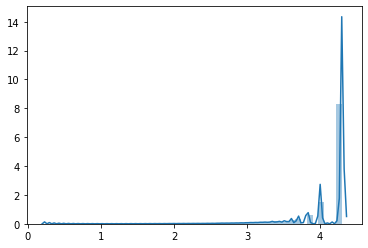

In [27]:
import seaborn as sns
sns.distplot(IDF)


In [36]:
def optimalR():
    postings = len(text_dic[term])
    idf= math.log((total_doc/postings),10)
    if idf>=4.3:
        r = 20
        print("r for >: ",r)
    else:
        r = 15
        print("r for less",r)
    return r

In [37]:
import itertools
def take(n, iterable):
    "Return first n items of the iterable as a list"
    x=itertools.islice(iterable, n)
    l = [i for i in x]
    return (l)
n_items = take(100, tf_dict.items())
print(n_items)

[('archivenam', {1: 0.0009302325581395349, 2: 0.00037893141341417203, 204: 0.0004154549231408392, 205: 0.00048496605237633366, 206: 0.002109704641350211, 901: 0.0008992805755395684, 902: 0.0020876826722338203, 1215: 0.00022857142857142857, 1216: 0.0001866368047779022, 1217: 0.0005482456140350877, 1243: 0.00019065776930409913, 1617: 0.00027948574622694243, 1690: 0.0005405405405405405, 1691: 0.00022763487366264513, 1692: 0.0001866368047779022, 1916: 0.00018925056775170325, 1955: 0.00018885741265344664, 4644: 0.00023452157598499062, 5003: 0.0004972650422675286, 5004: 0.00037167812674224123, 5028: 0.00025246149962130775, 5030: 0.0002920560747663551, 5035: 0.0002206531332744925, 5036: 0.00027277686852154935, 5039: 0.00022680880018144704, 5076: 0.00042211903756859433, 5778: 0.0004972650422675286, 5781: 0.0004224757076468103, 7163: 0.0010111223458038423, 7164: 0.00041220115416323167, 7168: 0.002457002457002457, 7169: 0.03125, 7170: 0.000942507068803016, 7171: 0.002577319587628866, 10121: 0.00

In [56]:
r = input("Enter r: ")
r=int(r)

Enter r: 10


In [57]:
text_dic_new={}
for term in text_dic:
    postings=text_dic[term]
    postings=sorted(postings, key = lambda x: x[1],reverse=True)
    high=postings[:r]
    low=postings[r:]
    high=sorted(high, key = lambda x: x[2],reverse=True)
    low=sorted(low, key = lambda x: x[2],reverse=True)
    
    text_dic_new[term]=[high,low]

In [64]:
#make high ad low and sort
text_dic_new={}
for term in text_dic:
    postings=text_dic[term]
    postings=sorted(postings, key = lambda x: x[1],reverse=True)
    r = optimalR()
    high=postings[:r]
    low=postings[r:]
    high=sorted(high, key = lambda x: x[2],reverse=True)
    low=sorted(low, key = lambda x: x[2],reverse=True)
    
    text_dic_new[term]=[high,low]

r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for 

r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for les

r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 

r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r fo

r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r fo

r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15


r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r

r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for l

r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for

r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15

r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15

r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15


r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for l

r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 1

r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r 

r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for 

r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  2

r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20


r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for 

r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for 

r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15


r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >

r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  2

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 

r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for

r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 

r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r

r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15

r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15

r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20


r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >

r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  

r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for l

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15


r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r f

r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r

r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r fo

r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for

r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r f

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  2

r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less

r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r f

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for 

r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r f

r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for 

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r fo

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for 

r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for 

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >: 

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r 

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r f

r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for le

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >

r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r fo

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r f

r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 1

r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for 

r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r f

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  2

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >: 

r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r f

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >: 

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for 

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r 

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15


r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r 

r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r 

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for le

r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r fo

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >: 

r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  

r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  2

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20

r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for les

r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  

r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for les

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r fo

r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >

r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for 

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for 

r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20

r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r

r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 1

r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for les

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r 

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for le

r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r f

r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for 

r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  2

r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r 

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:

r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for

r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for 

r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >: 

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less

r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r fo

r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r fo

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >: 

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >: 

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >

r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r f

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r fo

r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for le

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  2

r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r 

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for le

r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15


r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for

r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20


r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  

r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r

r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r f

r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >: 

r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r

r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r fo

r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r 

r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15


r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15


r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  2

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >

r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for 

r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  2

r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for

r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:

r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r 

r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >

r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for le

r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r f

r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r fo

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for

r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20


r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  

r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for 

r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  

r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for 

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  2

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for 

r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r

r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15


r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20


r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for l

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  2

r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for l

r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less

r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r 

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20


r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20


r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20


r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r f

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  

r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for

r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >: 

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for les

r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  

r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20


r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 1

r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 

r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20


r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20


r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  2

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r 

r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for l

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r f

r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  2

r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for 

r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 1

r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >

r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >

r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r 

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:

r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r f

r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20

r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  2

r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >: 

r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r

r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  2

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for les

r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for less 15
r for less 15
r for less 15
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for >:  20
r for le

In [89]:
#method 2 for r
text_dic_new={}
for term in text_dic:
    postings=text_dic[term]
    postings=sorted(postings, key = lambda x: x[1],reverse=True)
    r = 30+(int)(((maxDF)-len(postings))/(maxDF))*10
    r = int(r)
    high=postings[:r]
    low=postings[r:]
    high=sorted(high, key = lambda x: x[2],reverse=True)
    low=sorted(low, key = lambda x: x[2],reverse=True)
    
    text_dic_new[term]=[high,low]

In [103]:
query = input("Enter query: ")
k=input("enter k: ")
k=int(k)
pre_query=preprocess_query(query)
pre_query

Enter query: justice department
enter k: 20


['justic', 'depart']

In [104]:
for term in pre_query:
    if term not in text_dic:
        print("out of vocab",term)
        break

In [105]:
high_union=[]
for term in pre_query:
    high=[]
    for lst in text_dic_new[term][0]:
        high.append(lst[0])
    high_union=union(high_union,high)
    
if len(high_union)<k:
    low_union=[]
    for term in pre_query:
        low=[]
        for lst in text_dic_new[term][1]:
            low.append(lst[0])
        low_union=union(low_union,low)
    high_union=union(high_union,low_union)

In [106]:
print("top k files: ")
for i in range(k):
    print(files_path[high_union[i]])

top k files: 
Assignment3_IR/20_newsgroups/comp.sys.ibm.pc.hardware/61019
Assignment3_IR/20_newsgroups/rec.sport.baseball/102672
Assignment3_IR/20_newsgroups/comp.sys.ibm.pc.hardware/60422
Assignment3_IR/20_newsgroups/talk.politics.misc/178942
Assignment3_IR/20_newsgroups/talk.politics.mideast/75978
Assignment3_IR/20_newsgroups/comp.graphics/38330
Assignment3_IR/20_newsgroups/sci.electronics/54072
Assignment3_IR/20_newsgroups/talk.politics.guns/53318
Assignment3_IR/20_newsgroups/talk.politics.mideast/76380
Assignment3_IR/20_newsgroups/soc.religion.christian/20740
Assignment3_IR/20_newsgroups/comp.windows.x/68215
Assignment3_IR/20_newsgroups/comp.graphics/38598
Assignment3_IR/20_newsgroups/sci.crypt/15567
Assignment3_IR/20_newsgroups/talk.politics.guns/53327
Assignment3_IR/20_newsgroups/talk.politics.guns/55124
Assignment3_IR/20_newsgroups/sci.med/59111
Assignment3_IR/20_newsgroups/sci.crypt/15571
Assignment3_IR/20_newsgroups/talk.politics.misc/178456
Assignment3_IR/20_newsgroups/soc.re

In [107]:
#retrieve top k docs on high
tf_scores=[]
for term in pre_query:
    tf=[]
    for docID in high_union:
        if docID in tf_dict[term]:
            df=len(tf_dict[term])
            idf=np.log(len(files_path)/(df))
            tf.append((tf_dict[term][docID])*idf)
        else:
            tf.append(0)
    tf_scores.append(tf)
    
sum_scores=[sum(x) for x in zip(*tf_scores)]

scores={}
i=0
for s in sum_scores:
    scores[high_union[i]]=s
    i=i+1

In [108]:
net_score={}
for i in range(k):
    docID=high_union[i]
    net_score[docID]=static_score[docID]+scores[docID]

In [109]:
print("net scores of docs: ")
print(net_score)

net scores of docs: 
{3841: 0.2629824941901254, 9091: 0.1861988772024824, 3332: 0.19121584499343725, 18823: 0.0897680518656886, 17159: 0.3061403215119505, 1169: 0.11981331723987937, 12689: 0.13519100940541962, 16022: 0.15559917267072573, 17560: 0.0672091943802156, 15258: 0.1473143657509806, 5915: 0.21633162501226702, 1436: 0.13695213689066787, 11422: 0.07224988395873176, 16031: 0.13602126273161197, 16928: 0.08710036384259698, 13472: 0.12282559463304826, 11426: 0.10364231258168333, 18339: 0.06991924254070815, 15398: 0.08148483153240424, 10023: 0.28300427727790733}


In [110]:
print(len(net_score))

20
